In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')


In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:

df = pd.read_csv('/drive/MyDrive/housing/Ecommerce Customers.csv')


In [ ]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
x=df.iloc[:,3:7]

In [ ]:
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [ ]:
x.values

array([[34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       ...,
       [32.64677668, 11.49940906, 38.33257633,  4.95826447],
       [33.32250105, 12.39142299, 36.84008573,  2.33648467],
       [33.71598092, 12.41880832, 35.77101619,  2.73515957]])

In [ ]:
y=df.iloc[:,-1].values

In [ ]:
y

array([587.95105397, 392.20493344, 487.54750487, 581.85234404,
       599.40609205, 637.10244792, 521.57217476, 549.90414611,
       570.20040896, 427.1993849 , 492.60601272, 522.33740461,
       408.64035107, 573.41586733, 470.4527333 , 461.7807422 ,
       457.84769594, 407.70454755, 452.31567548, 605.0610388 ,
       534.70574381, 419.93877484, 436.51560573, 519.34098913,
       700.91709162, 423.17999168, 619.89563986, 486.83893477,
       529.53766534, 554.72208383, 497.5866713 , 447.68790654,
       588.71260551, 491.07322368, 507.44183234, 521.88357317,
       347.77692663, 490.73863214, 478.17033405, 537.84619527,
       532.75178758, 501.87443028, 591.19717818, 547.24434342,
       448.22982919, 549.86059046, 593.91500297, 563.67287336,
       479.73194909, 416.35835358, 725.58481406, 442.66725174,
       384.62657157, 451.45744687, 522.40414126, 483.67330802,
       520.89879445, 453.16950235, 496.65070807, 547.36514059,
       616.85152297, 507.212569  , 613.59932337, 483.15

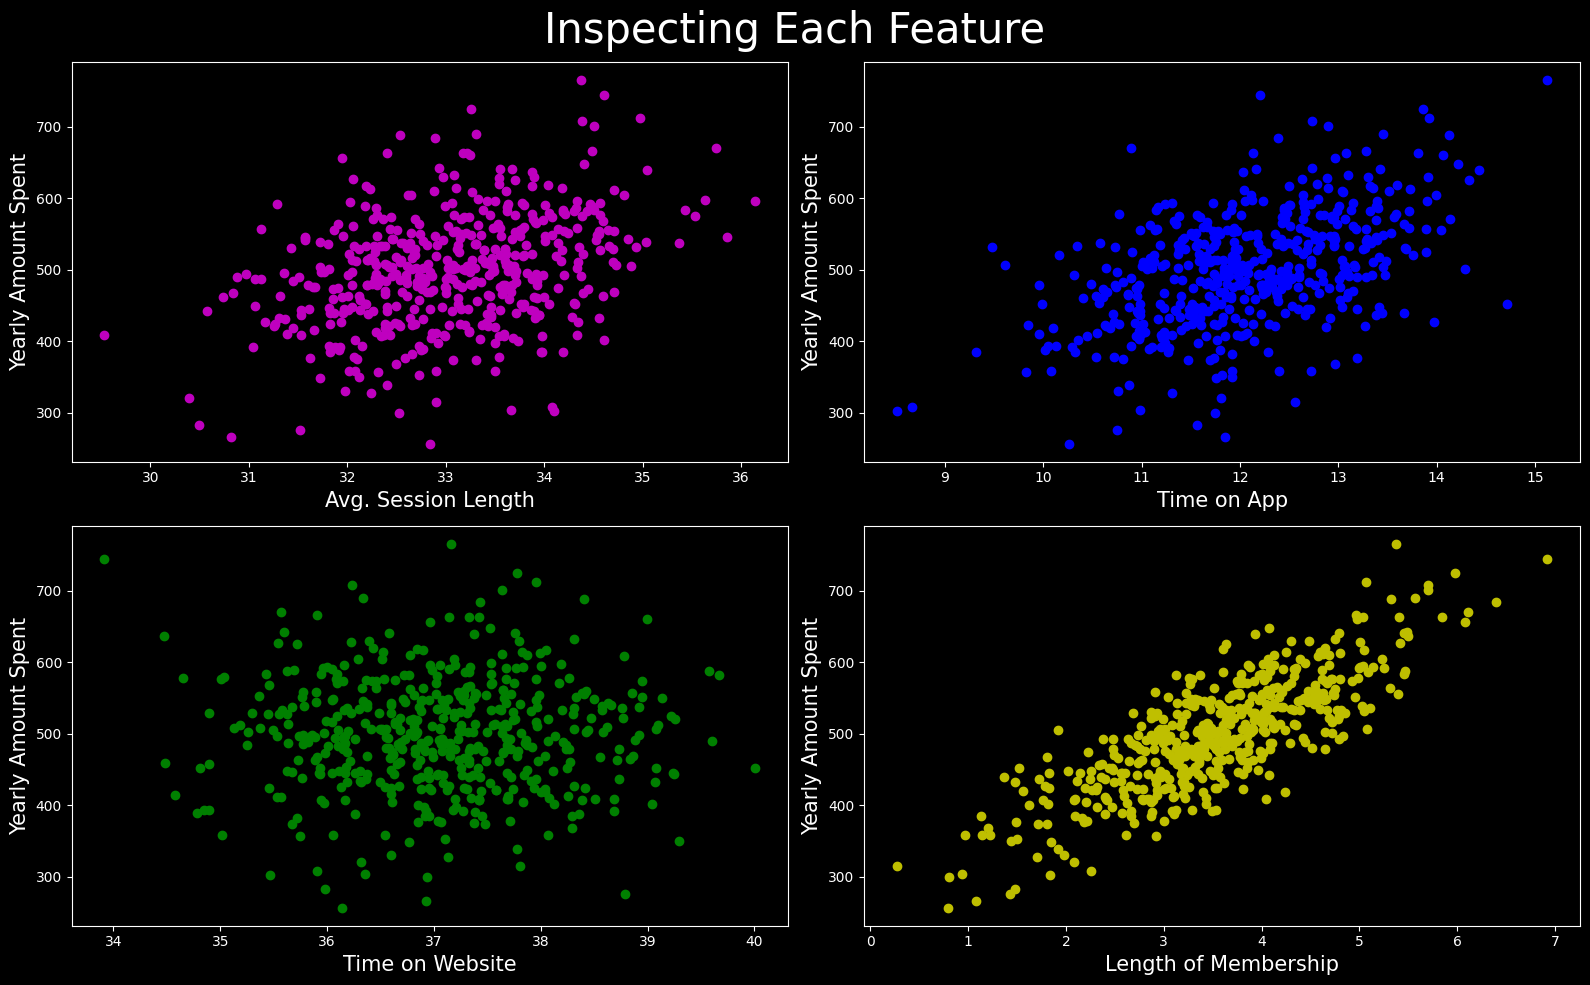

In [ ]:
#visulizing the model
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(16,10))
plt.suptitle('Inspecting Each Feature', fontsize = 30)

axes[0,0].plot(df['Avg. Session Length'],df['Yearly Amount Spent'],'mo')
axes[0,0].set_ylabel('Yearly Amount Spent', fontsize = 15)
axes[0,0].set_xlabel('Avg. Session Length', fontsize = 15)

axes[0,1].plot(df['Time on App'],df['Yearly Amount Spent'],'bo')
axes[0,1].set_ylabel('Yearly Amount Spent', fontsize = 15)
axes[0,1].set_xlabel('Time on App', fontsize = 15)

axes[1,0].plot(df['Time on Website'],df['Yearly Amount Spent'],'go')
axes[1,0].set_ylabel('Yearly Amount Spent', fontsize = 15)
axes[1,0].set_xlabel('Time on Website', fontsize = 15)

axes[1,1].plot(df['Length of Membership'],df['Yearly Amount Spent'],'yo')
axes[1,1].set_ylabel('Yearly Amount Spent', fontsize = 15)
axes[1,1].set_xlabel('Length of Membership', fontsize = 15)

plt.tight_layout()

In [ ]:
#Splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x_test.shape

(100, 4)

In [ ]:
#Standardizing data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
#Appling Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Intercept:",lr.intercept_.round(2))
print("Coefficient:",lr.coef_.round(2))

Intercept: 501.99
Coefficient: [25.25 38.7   0.32 63.54]


Testing and Evaluating Model

In [ ]:
y_pred=lr.predict(x_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2:",metrics.r2_score(y_test,y_pred))

RMSE: 10.481590584636482
MAE: 8.558441885315247
R2: 0.9778130629184126
